<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/OB_3%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수 설명

- age: 나이 (연속형 변수)
- sex: 성별 (범주형 변수)
- bmi: (연속형 변수)
- children: 자녀의 수: (범주형 변수)
- smoker: 흡연 여부: (범주형 변수)
- region: 지역 (범주형 변수)
- charges: 개인별 보험료 (연속형 변수)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

insurance = pd.read_csv('/content/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# 결측치 확인
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


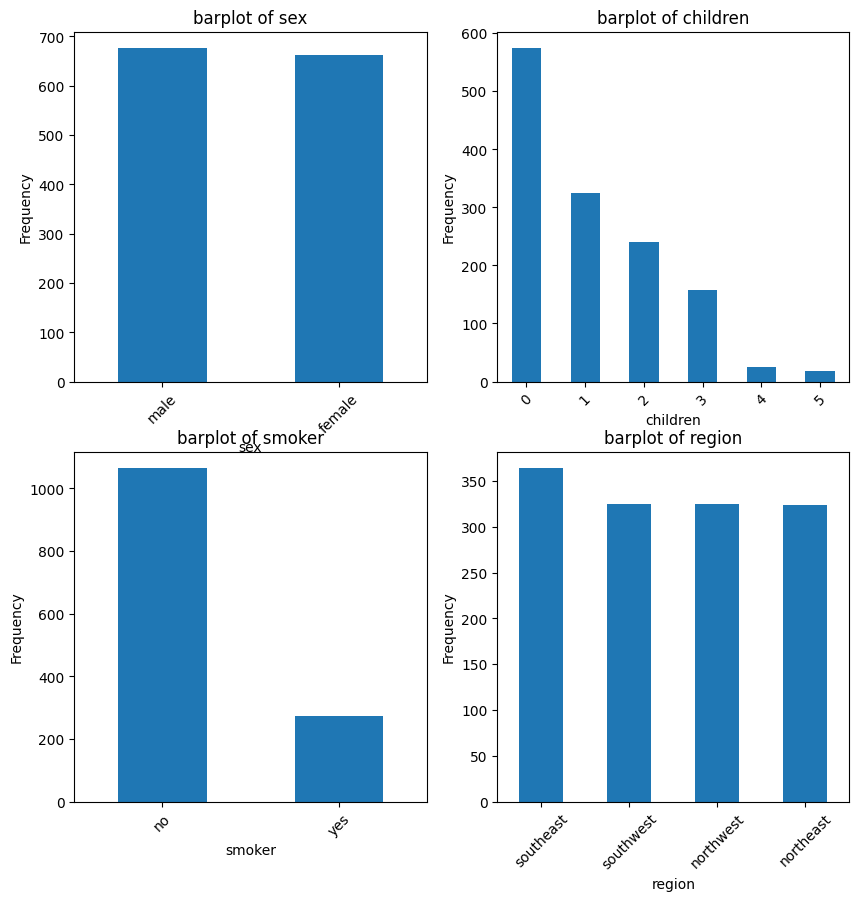

In [11]:
# 범주형 변수 확인, Barplot 그리기
plt.figure(figsize = (10, 10))
col = ["sex","children",  "smoker", "region"]

for i in range(4):
  plt.subplot(2, 2, i+1)
  insurance[col[i]].value_counts(sort = True).plot.bar(rot = 45)
  plt.title(f"barplot of {col[i]}")
  plt.xlabel(f"{col[i]}")
  plt.ylabel("Frequency")

plt.show()

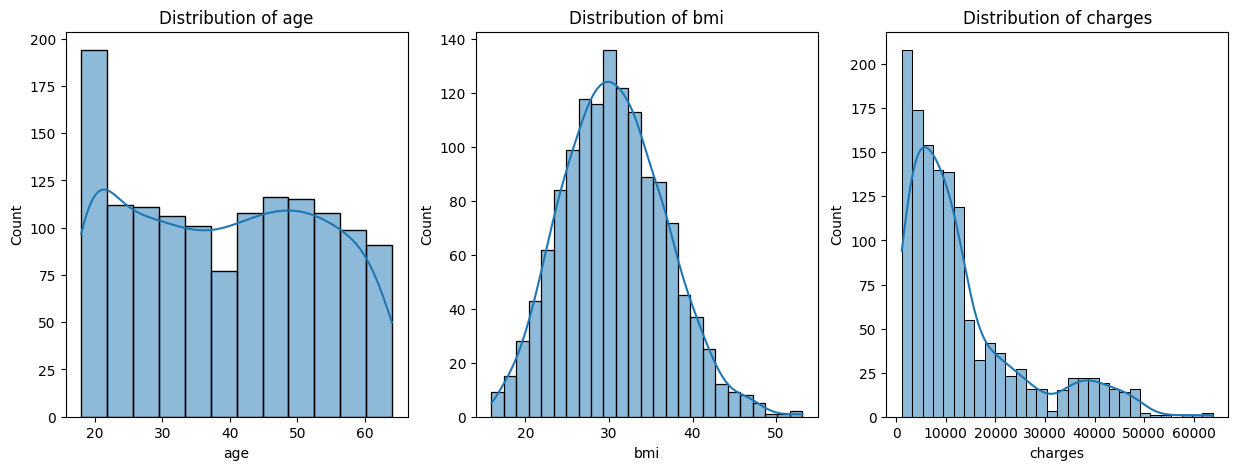

In [10]:
# 연속형 변수 확인, KDE 그래프 그리기
plt.figure(figsize = (15, 5))
col = ["age", "bmi", "charges"]

for i in range(3):
  plt.subplot(1, 3, i+1)
  sns.histplot(insurance[col[i]], fill = True, kde = True)
  plt.title(f"Distribution of {col[i]}")
  plt.xlabel(f"{col[i]}")

- 라벨 인코딩

In [16]:
insurance.sex.value_counts()

,count
sex,
male,676
female,662


In [8]:
insurance.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [9]:
insurance.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['region'] = le.fit_transform(insurance['region'])

In [23]:
insurance.sex.value_counts() # female: 0, male: 1

,count
sex,
1,676
0,662


In [25]:
insurance.smoker.value_counts() # no: 0, yes: 1

,count
smoker,
0,1064
1,274


In [26]:
insurance.region.value_counts() # northeast: 0, northwest: 1, southeast: 2, southwest: 3

,count
region,
2,364
3,325
1,325
0,324


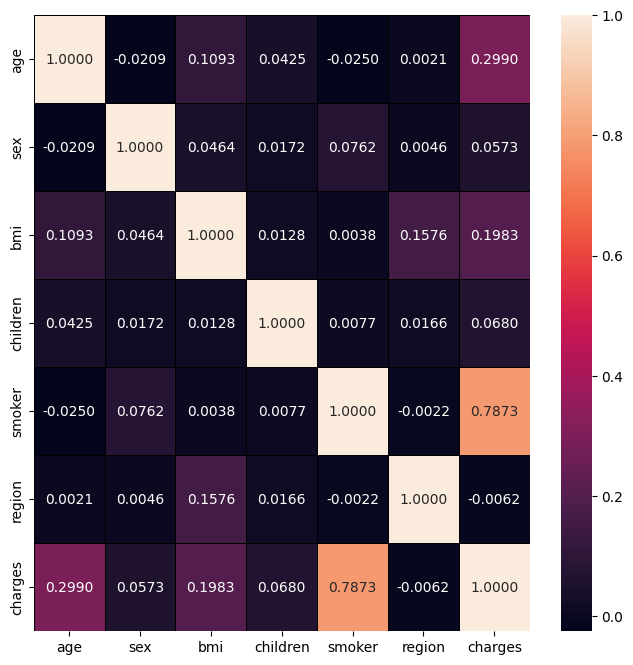

In [27]:
# 상관관계 확인
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(insurance.corr(), annot = True, linewidth = 0.5, linecolor = "black",
            fmt = ".4f", ax = ax)
plt.show()

-> 흡연 여부와 보험 비용사이의 상관관계가 높음

smoker, age, bmi, children, sex, region 순

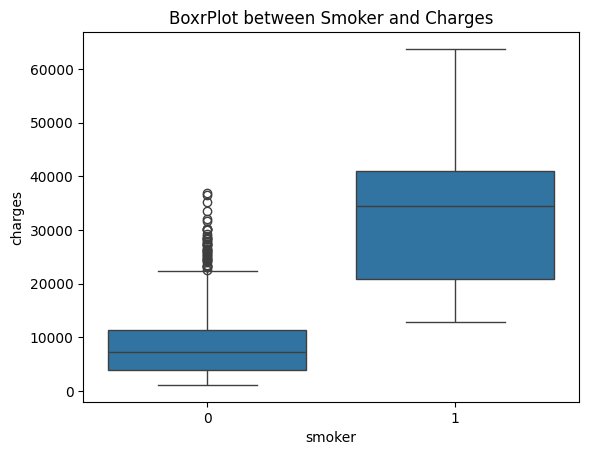

In [28]:
# 흡연 여부에 따른 보험 비용 차이
sns.boxplot(x = insurance["smoker"], y = insurance["charges"])
plt.title("BoxrPlot between Smoker and Charges")
plt.show()

In [29]:
# 비흡연자의 평균 보험료
insurance[insurance["smoker"] == 0]["charges"].mean()

8434.268297856204

In [30]:
# 흡연자의 평균 보험료
insurance[insurance["smoker"] == 1]["charges"].mean()

32050.23183153284

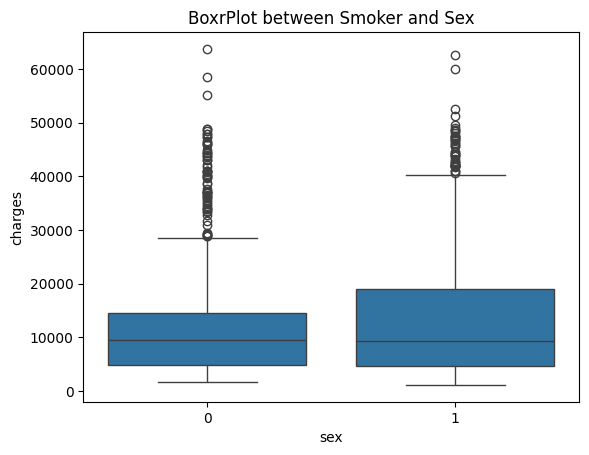

In [39]:
# 성별에 따른 보험 비용 차이
sns.boxplot(x = insurance["sex"], y = insurance["charges"])
plt.title("BoxrPlot between Smoker and Sex")
plt.show()

In [40]:
# 여성의 평균 보험료
insurance[insurance["sex"] == 0]["charges"].mean()

12569.578843835347

In [41]:
# 남성의 평균 보험료
insurance[insurance["sex"] == 1]["charges"].mean()

13956.751177721893

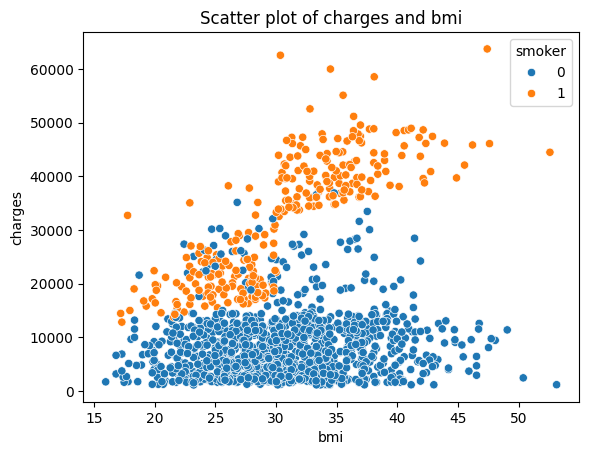

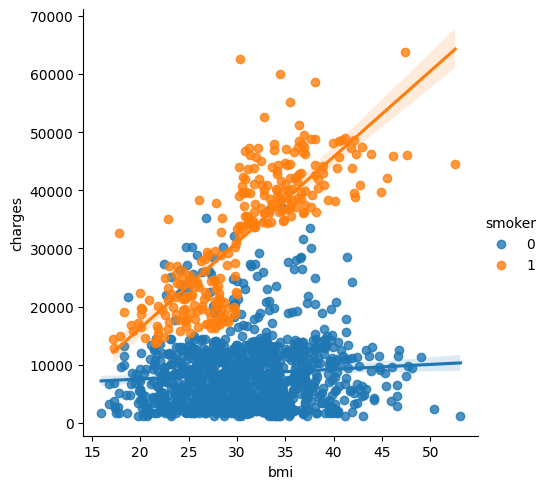

In [32]:
# 흡연 여부 별 bmi와 보험 비용 산점도
ax = sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance)

 -> 비흡연자는 bmi에 따른 보험 비용의 차이가 거의 없지만 흡연자는 bmi가 높을수록 보험 비용이 높아짐

In [31]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


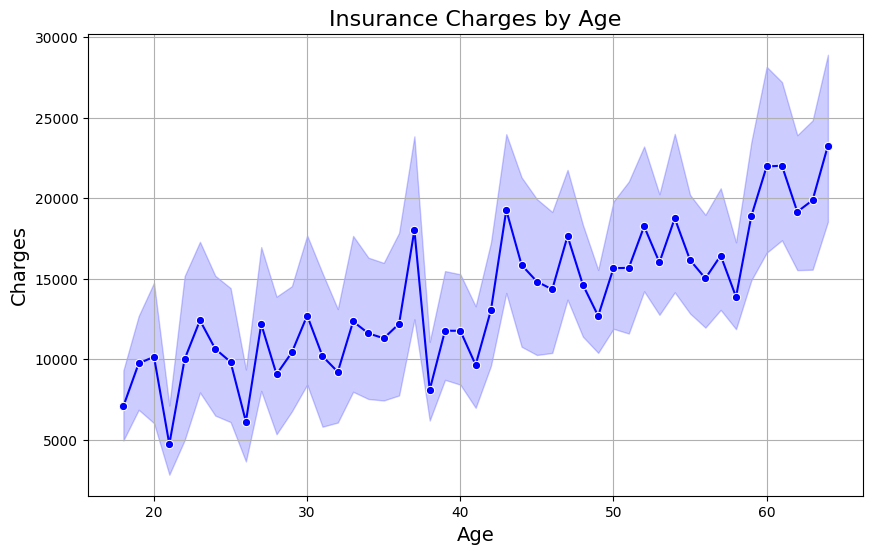

In [34]:
# 나이에 따른 보험 비용
plt.figure(figsize=(10, 6))
sns.lineplot(data=insurance, x='age', y='charges', marker='o', color='b')
plt.title('Insurance Charges by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.grid(True)
plt.show()

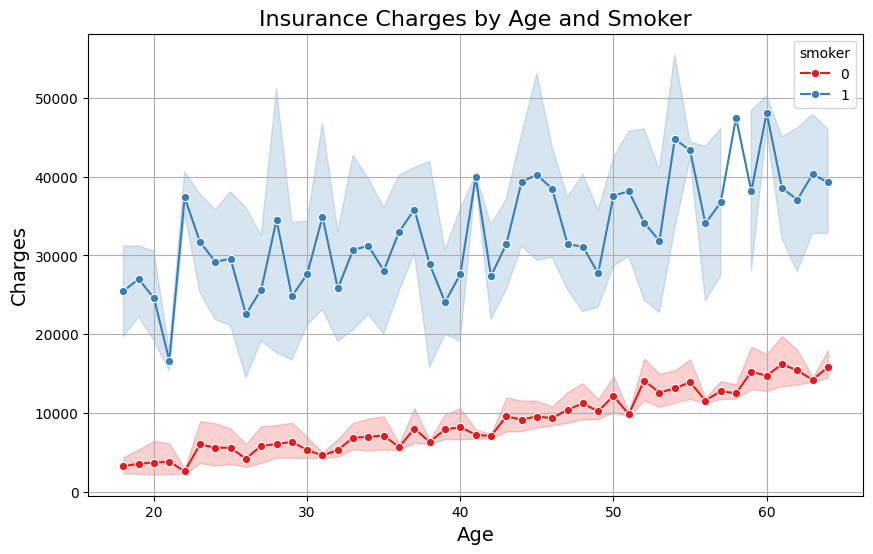

In [36]:
# 나이와 흡연 여부에 따른 보험 비용
plt.figure(figsize=(10, 6))
sns.lineplot(data=insurance, x='age', y='charges', hue='smoker', marker='o', palette='Set1')
plt.title('Insurance Charges by Age and Smoker', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.grid(True)
plt.show()

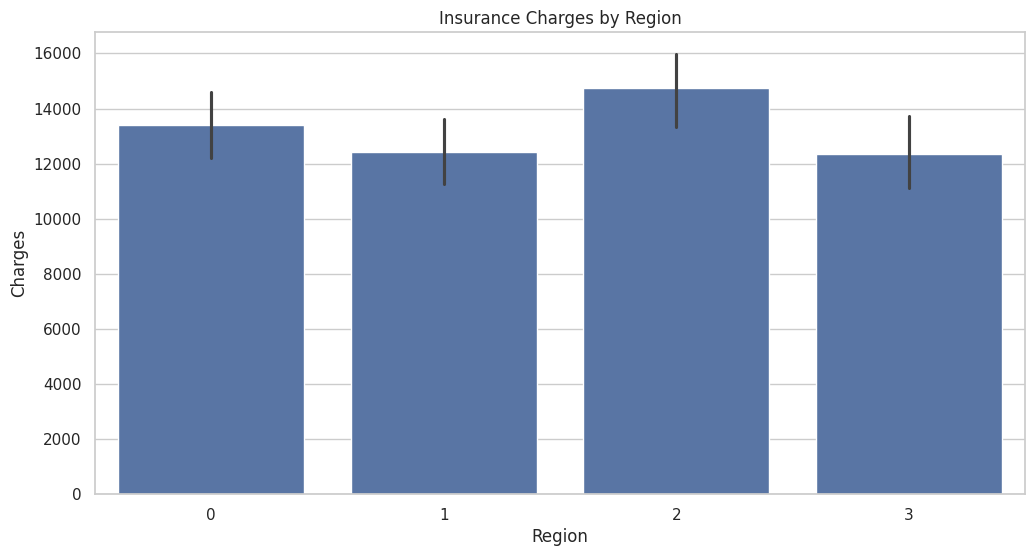

In [47]:
# 지역에 따른 보험 비용
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='region', y='charges', data=insurance)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()